## Import Liberaires

In [98]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")


## Load Data

In [99]:
Big_mart = pd.read_csv("Train.csv")

In [100]:
Big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
# number of data points & number of features
Big_mart.shape

(8523, 12)

In [102]:
# getting some information about thye dataset
Big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

## Checking Missing values

In [103]:
Big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [104]:
Big_mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [105]:
Big_mart[Big_mart.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Mean --> average

Mode --> more repeated value

In [106]:
Big_mart['Item_Weight'] = Big_mart['Item_Weight'].fillna(Big_mart['Item_Weight'].median())

In [107]:
Big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [108]:
Big_mart[Big_mart.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [109]:
Big_mart['Outlet_Size'] = Big_mart['Outlet_Size'].fillna(Big_mart['Outlet_Size'].mode()[0])

In [110]:
Big_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [111]:
Big_mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Data Analysis

In [112]:
Big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Numerical Features

In [113]:
sns.set()
#sns.set() is used to set the default style for all Seaborn plots.
#It makes your graphs look cleaner and more visually appealing without needing extra styling code.

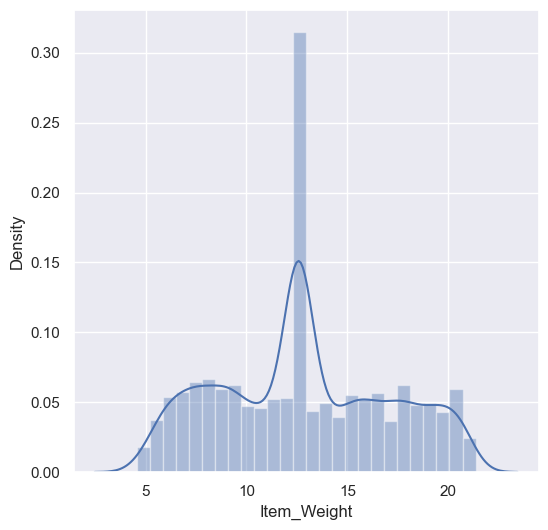

In [114]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(Big_mart['Item_Weight'])
plt.show()

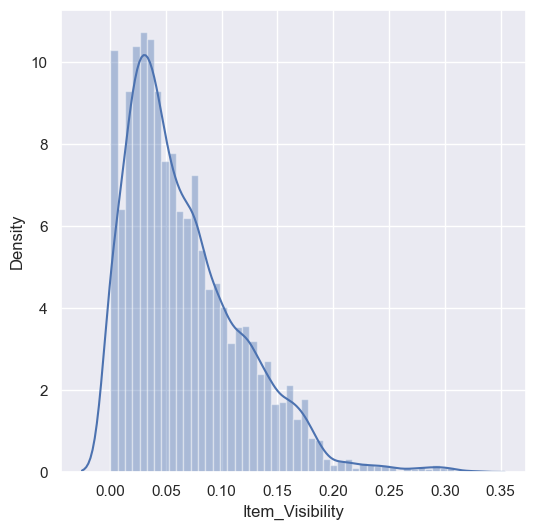

In [115]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(Big_mart['Item_Visibility'])
plt.show()

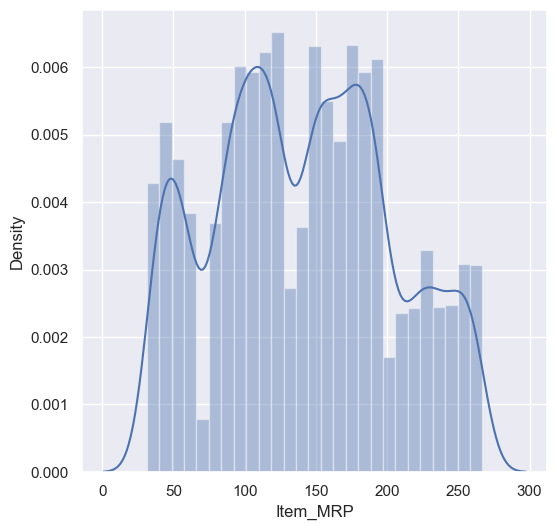

In [116]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(Big_mart['Item_MRP'])
plt.show()

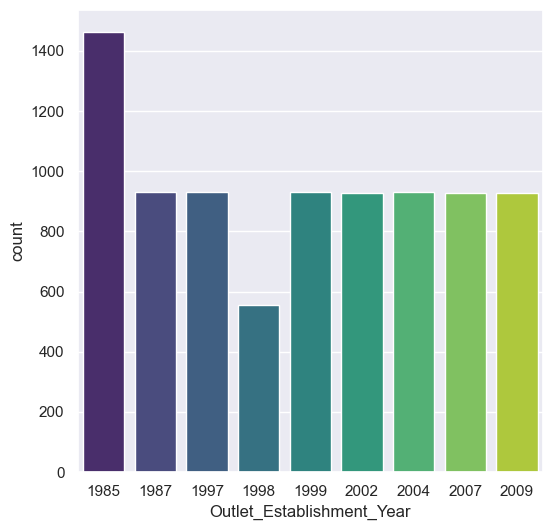

In [117]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=Big_mart, palette='viridis')
plt.show()


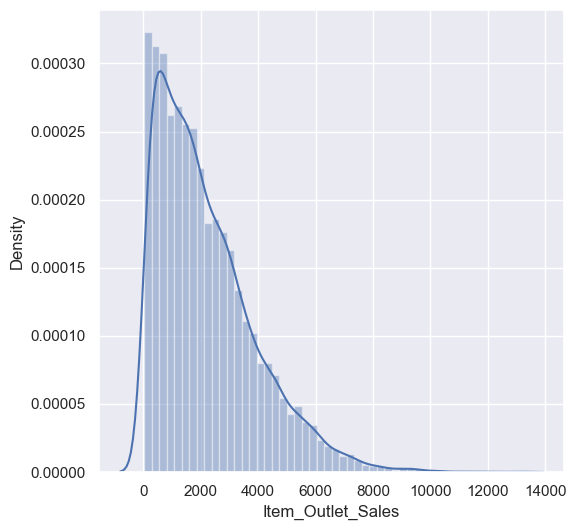

In [118]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(Big_mart['Item_Outlet_Sales'])
plt.show()

## Categorical Features

In [119]:
Big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


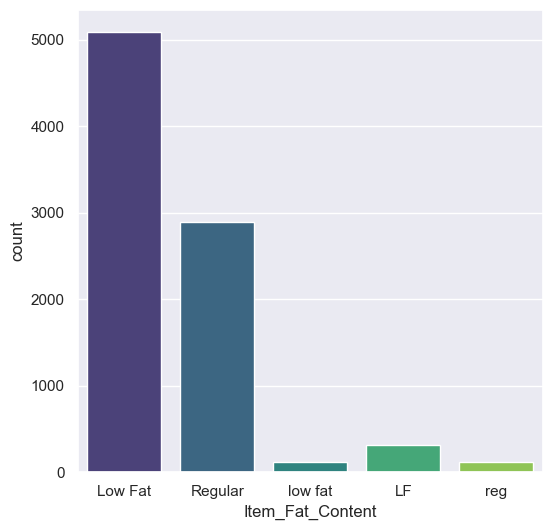

In [120]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Item_Fat_Content',data=Big_mart,palette='viridis')
plt.show()

- Here we can identify that still Data is not cleaned because Low Fat ,Regular is correct change this (low fat,LF,reg)

In [121]:
Big_mart[Big_mart.Item_Fat_Content == "LF"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
45,FDM39,6.42,LF,0.089499,Dairy,178.1002,OUT010,1998,Medium,Tier 3,Grocery Store,358.2004
65,FDC46,17.70,LF,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266
121,DRJ13,12.65,LF,0.063018,Soft Drinks,159.0578,OUT045,2002,Medium,Tier 2,Supermarket Type1,2085.9514
175,FDR47,17.85,LF,0.000000,Breads,196.5794,OUT010,1998,Medium,Tier 3,Grocery Store,585.2382
207,DRF36,16.10,LF,0.023625,Soft Drinks,189.3846,OUT045,2002,Medium,Tier 2,Supermarket Type1,3630.6074
...,...,...,...,...,...,...,...,...,...,...,...,...
8367,FDA32,12.60,LF,0.052691,Fruits and Vegetables,216.3192,OUT019,1985,Small,Tier 1,Grocery Store,215.7192
8379,FDV39,11.30,LF,0.007280,Meat,199.3426,OUT046,1997,Small,Tier 1,Supermarket Type1,2372.9112
8391,FDV15,10.30,LF,0.146172,Meat,103.3648,OUT046,1997,Small,Tier 1,Supermarket Type1,3219.8088
8443,FDX15,17.20,LF,0.156542,Meat,162.4578,OUT049,1999,Medium,Tier 1,Supermarket Type1,2888.2404


In [122]:
Big_mart['Item_Fat_Content'] = Big_mart.Item_Fat_Content.replace({"LF" : "Low Fat"})

In [123]:
Big_mart['Item_Fat_Content'] = Big_mart.Item_Fat_Content.replace({"low fat" : "Low Fat"})

In [124]:
Big_mart['Item_Fat_Content'] = Big_mart.Item_Fat_Content.replace({"reg" : "Regular"})

In [125]:
Big_mart[Big_mart.Item_Fat_Content == "reg"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


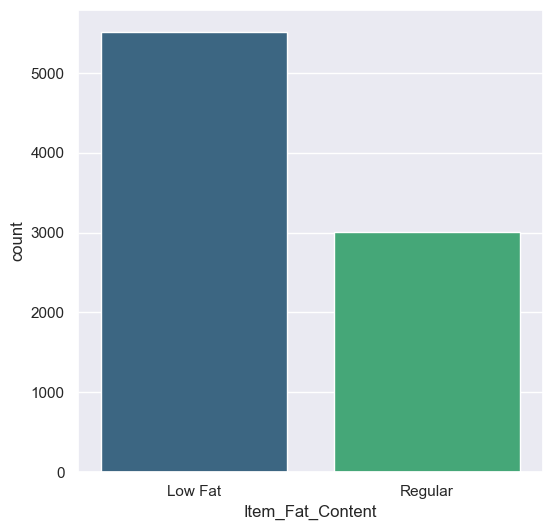

In [126]:
# Item_Fat_Content column 
plt.figure(figsize=(6,6))
sns.countplot(x = 'Item_Fat_Content',data=Big_mart,palette='viridis')
plt.show()

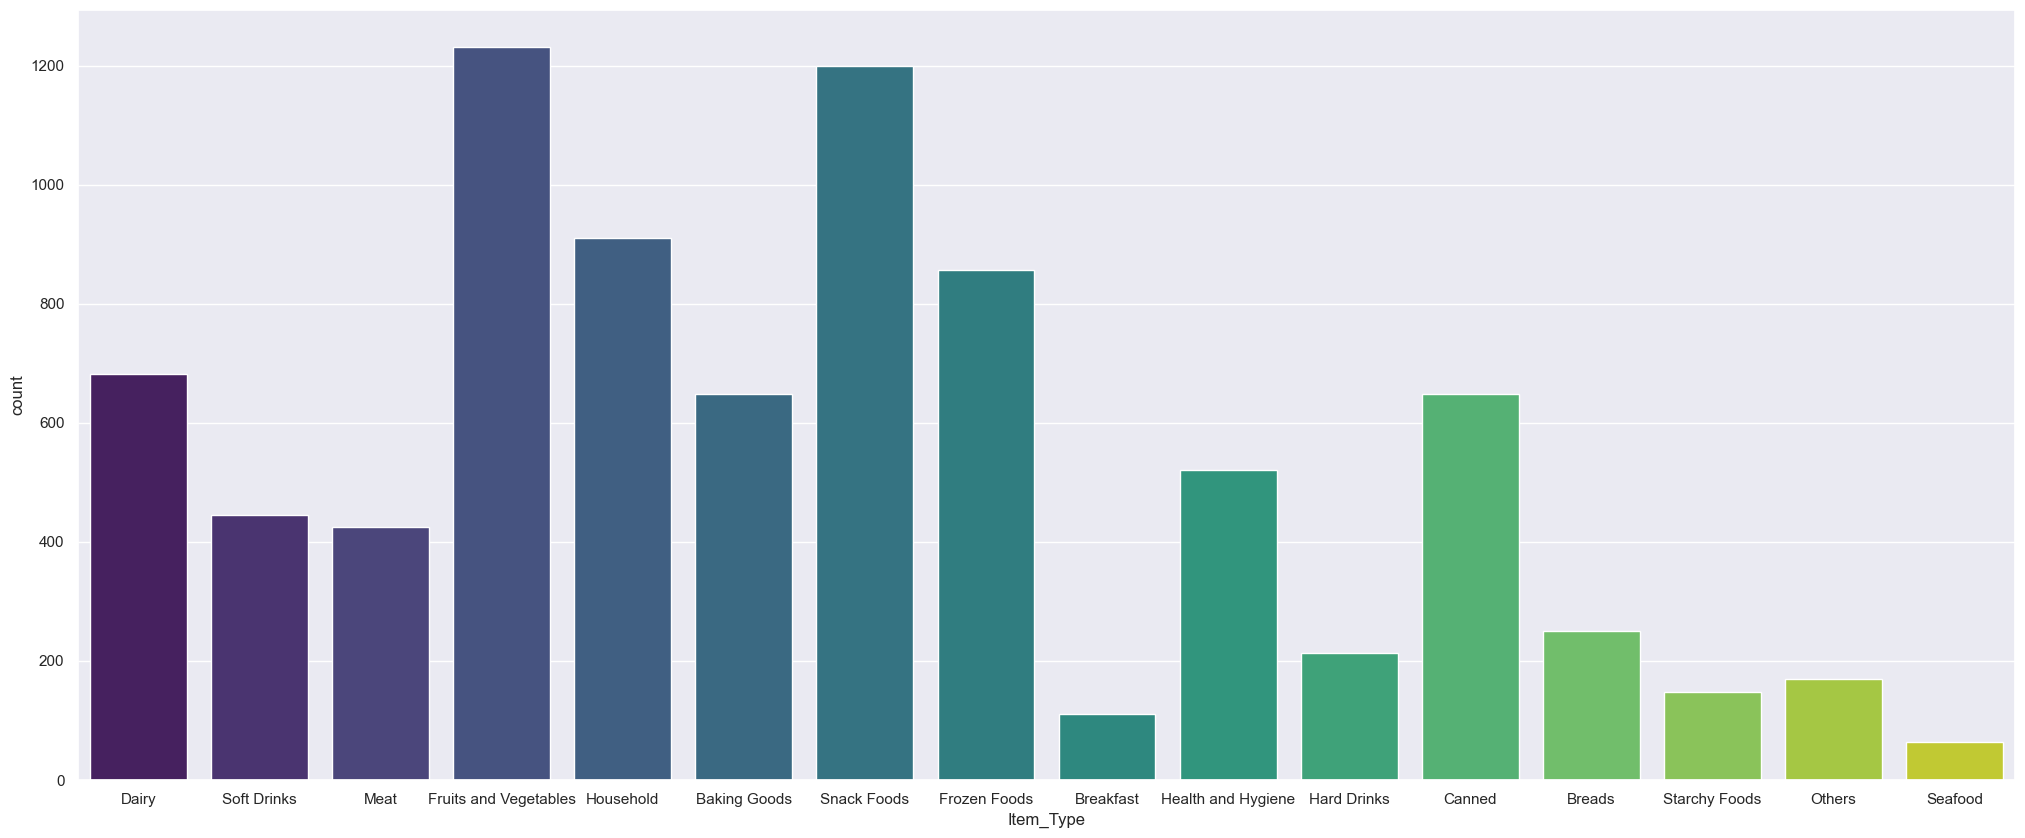

In [127]:
# Item_Type
plt.figure(figsize=(25,10))
sns.countplot(x = 'Item_Type',data=Big_mart,palette='viridis')
plt.show()

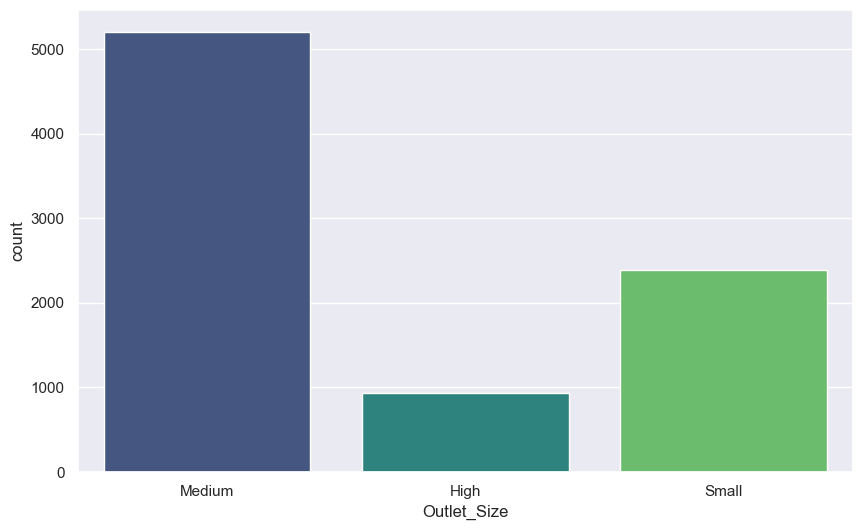

In [128]:
#Outlet_Size columns
plt.figure(figsize=(10,6))
sns.countplot(x = 'Outlet_Size',data=Big_mart,palette='viridis')
plt.show()

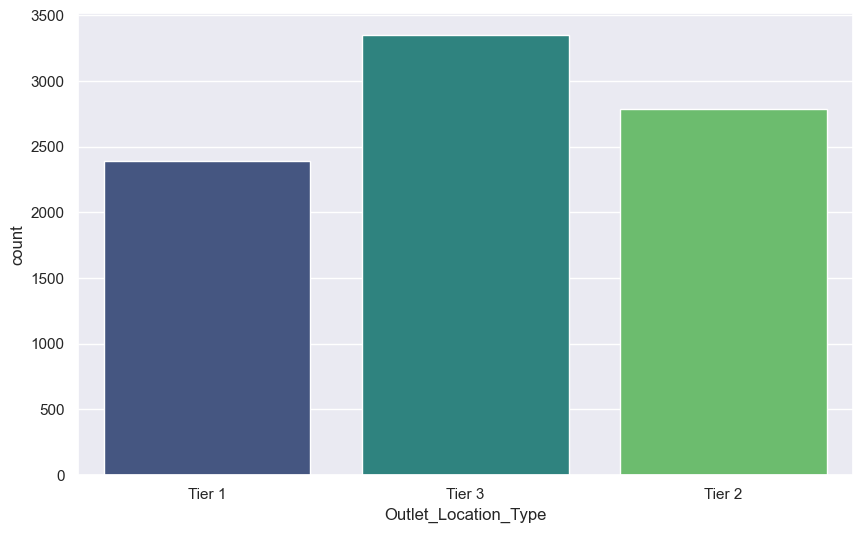

In [129]:
# Outlet_Location_Type columns
plt.figure(figsize=(10,6))
sns.countplot(x = 'Outlet_Location_Type',data=Big_mart,palette='viridis')
plt.show()

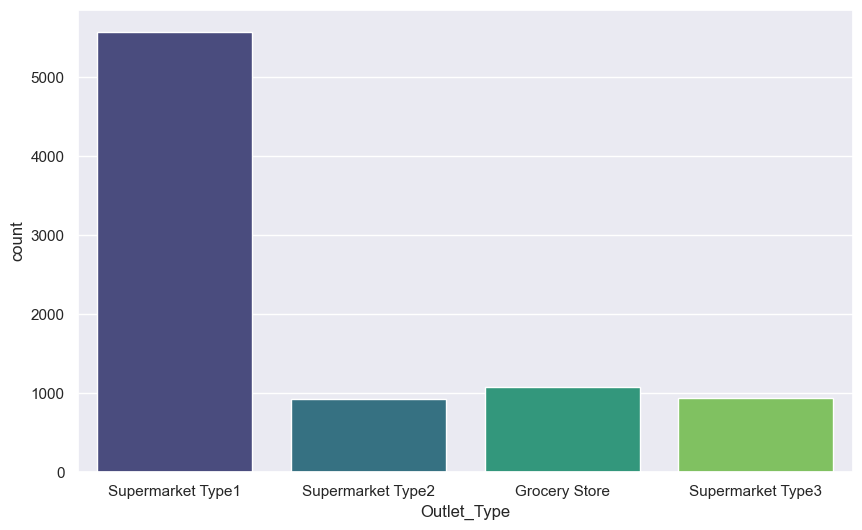

In [130]:
# Outlet_Type columns
plt.figure(figsize=(10,6))
sns.countplot(x = 'Outlet_Type',data=Big_mart,palette='viridis')
plt.show()

In [131]:
Big_mart['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [132]:
Big_mart['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [133]:
Big_mart['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [134]:
Big_mart['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

## Label Encoding

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
encoder = LabelEncoder()

In [137]:
Big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [138]:
Big_mart['Item_Identifier'] = encoder.fit_transform(Big_mart['Item_Identifier'])

Big_mart['Item_Fat_Content'] = encoder.fit_transform(Big_mart['Item_Fat_Content'])

Big_mart['Item_Type'] = encoder.fit_transform(Big_mart['Item_Type'])

Big_mart['Outlet_Identifier'] = encoder.fit_transform(Big_mart['Outlet_Identifier'])

Big_mart['Outlet_Size'] = encoder.fit_transform(Big_mart['Outlet_Size'])

Big_mart['Outlet_Location_Type'] = encoder.fit_transform(Big_mart['Outlet_Location_Type'])

Big_mart['Outlet_Type'] = encoder.fit_transform(Big_mart['Outlet_Type'])

In [139]:
Big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Segergating X and y

In [140]:
X = Big_mart.drop(columns='Item_Outlet_Sales',axis=1)
y = Big_mart.Item_Outlet_Sales

## Train Test Split

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [143]:
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("-"*30)
print("X_test shape :",X_test.shape)
print("y_test shape :",X_test.shape)

X_train shape : (6818, 11)
y_train shape : (6818,)
------------------------------
X_test shape : (1705, 11)
y_test shape : (1705, 11)


In [144]:
print(X_train)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
549              1102        9.500                 1         0.035206   
7757             1322       18.000                 0         0.047473   
764              1169       17.600                 1         0.076122   
6867              789        8.325                 0         0.029845   
2716              757       12.850                 0         0.137228   
...               ...          ...               ...              ...   
5734             1172        9.395                 1         0.286345   
5191              263       15.600                 0         0.117575   
5390             1464       17.600                 0         0.018944   
860               609       20.350                 0         0.054363   
7270             1414       16.350                 0         0.016993   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
549           6  171.3448                  9    

## Build Model

## XGBoost Regressor
XGBoost Regressor is a machine learning algorithm used to predict continuous numerical values (regression tasks).
It is based on Gradient Boosting, but it is faster, more accurate, and more efficient than traditional gradient boosting models.

In [145]:
!pip install xgboost


In [146]:
from xgboost import XGBRegressor

In [147]:
regressor = XGBRegressor()

In [148]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [149]:
X_train_pred =  regressor.predict(X_train)

In [150]:
pd.DataFrame(X_train_pred,columns=['Predicted'])

,Predicted
0,2501.525879
1,2704.018066
2,1437.122681
3,549.654175
4,2649.396973
...,...
6813,206.892349
6814,1391.100830
6815,4280.472168
6816,1574.355713


In [151]:
pd.DataFrame(y_train)

,Item_Outlet_Sales
549,2386.2272
7757,3103.9596
764,1125.2020
6867,284.2966
2716,4224.5010
...,...
5734,280.9676
5191,1301.6390
5390,6145.3340
860,1649.8524


In [152]:
from sklearn.metrics import r2_score

In [153]:
print("R squared :",r2_score(y_train,X_train_pred))

R squared : 0.8698351206603934


In [154]:
y_train_pred = regressor.predict(X_test)

In [155]:
pd.DataFrame(y_train_pred,columns=['Predicted'])

,Predicted
0,1147.258667
1,933.891724
2,1007.881287
3,5374.615234
4,1719.455444
...,...
1700,1400.236572
1701,1985.621460
1702,863.873108
1703,822.876038


In [156]:
pd.DataFrame(y_test)

,Item_Outlet_Sales
7503,1743.0644
2957,356.8688
7031,377.5086
1084,5778.4782
856,2356.9320
...,...
7205,3004.0896
3257,890.8404
6346,629.1810
6318,253.0040


In [157]:
print("R squared :",r2_score(y_test,y_train_pred))

R squared : 0.5246342336961346
